In [1]:
!pip install seaborn matplotlib pandas --quiet


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/amazon_reviews_us_Electronics_v1_00.tsv", sep='\t', on_bad_lines='skip', low_memory=False)

# Preview the first 5 rows
df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [13]:
# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933403 entries, 0 to 2933402
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 335.7+ MB


,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,1
product_category,0
star_rating,0
helpful_votes,0
total_votes,0


In [14]:
# Summary statistics for numerical columns
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,2.933403e+06,2.933403e+06,2.933403e+06,2.933403e+06,2.933403e+06
mean,2.840396e+07,5.106211e+08,4.048962e+00,1.535947e+00,1.972463e+00
std,1.538848e+07,2.869464e+08,1.382636e+00,2.022812e+01,2.129872e+01
min,1.000500e+04,6.478000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.482430e+07,2.627247e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.743774e+07,5.086003e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.283171e+07,7.634480e+08,5.000000e+00,1.000000e+00,1.000000e+00
max,5.309658e+07,9.999982e+08,5.000000e+00,1.278600e+04,1.294400e+04


<ipython-input-15-1a80575cba2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='star_rating', palette='Blues')


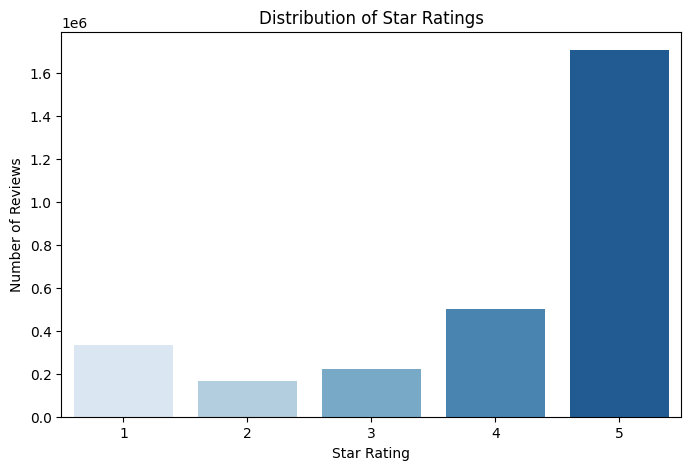

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='star_rating', palette='Blues')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()


<ipython-input-16-c52f662d6646>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='verified_purchase', palette='Set2')


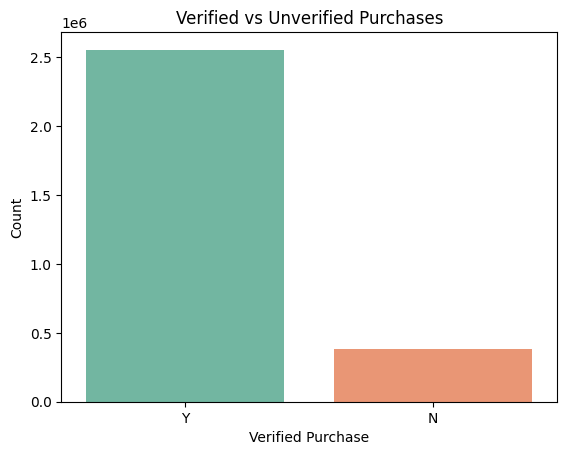

In [16]:
sns.countplot(data=df, x='verified_purchase', palette='Set2')
plt.title('Verified vs Unverified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.show()


<ipython-input-17-7250d1a05495>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='mako')
<ipython-input-17-7250d1a05495>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


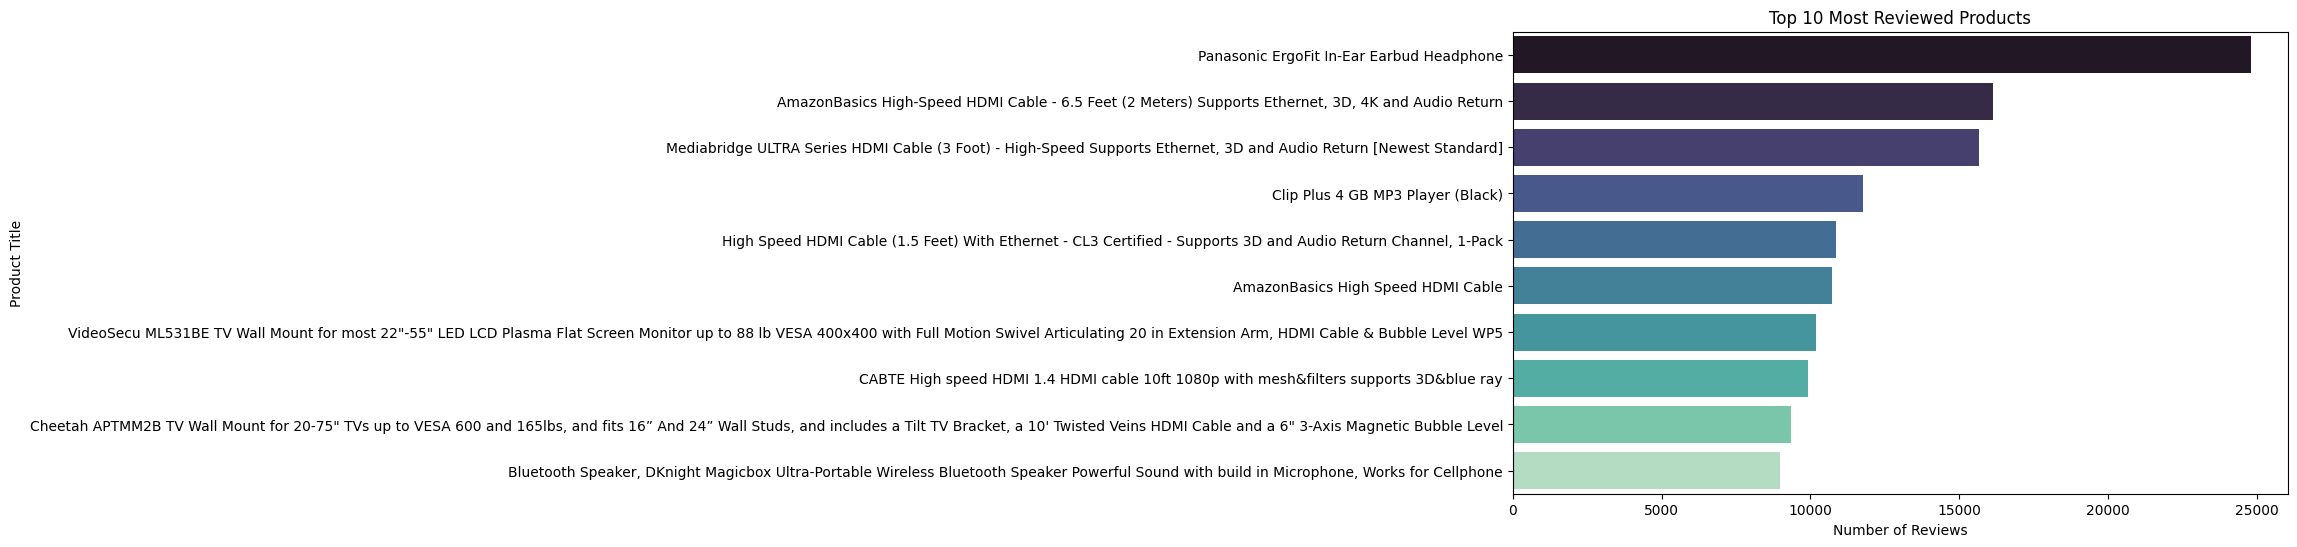

In [17]:
top_products = df['product_title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='mako')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()
